In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grammy-award-nominees-and-winners-1958-2024/Supplementary Table Producer of the Year 2019-2024.csv
/kaggle/input/grammy-award-nominees-and-winners-1958-2024/Grammy Award Nominees and Winners 1958-2024.csv


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/kaggle/input/grammy-award-nominees-and-winners-1958-2024/Supplementary Table Producer of the Year 2019-2024.csv')
df.head()

,Year,Ceremony,Award ID,Award Type,Award Name,Work,Nominee,Winner
0,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Almost Free (Fidlar) (A) • Burning (Maggie R...,Ricky Reed,False
1,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Arizona Baby (Kevin Abstract) (A) • Lover (T...,Jack Antonoff,False
2,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Heat Of The Summer (Young The Giant) (T) • H...,John Hill,False
3,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• The Angels In Heaven Done Signed My Name (Le...,Dan Auerbach,False
4,2019,62,686,Nominee,"Producer Of The Year, Non-Classical","• When We Fall Asleep, Where Do We Go? (Billie...",Finneas,True


In [88]:
df.tail()

,Year,Ceremony,Award ID,Award Type,Award Name,Work,Nominee,Winner
56,2024,67,688,Nominee,"Producer Of The Year, Classical",• American Dreams (Louis Langrée & Cincinnati ...,Dirk Sobotka,False
57,2024,67,688,Nominee,"Producer Of The Year, Classical",• Beethoven: The Complete Symphonies (Antonell...,Christoph Franke,False
58,2024,67,688,Nominee,"Producer Of The Year, Classical","• Biber: Mystery Sonatas (Alan Choo, Jeannette...",Erica Brenner,False
59,2024,67,688,Nominee,"Producer Of The Year, Classical",• Mor (Karen Haugom Olsen & Nidaros Domkor) (A...,Morten Lindberg,False
60,2024,67,688,Nominee,"Producer Of The Year, Classical",• Bartók: String Quartet No.3; Suite From 'The...,Elaine Martone,True


In [19]:
df.shape

(61, 8)

In [20]:
df.columns

Index(['Year', 'Ceremony', 'Award ID', 'Award Type', 'Award Name', 'Work',
       'Nominee', 'Winner'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        61 non-null     int64 
 1   Ceremony    61 non-null     int64 
 2   Award ID    61 non-null     int64 
 3   Award Type  61 non-null     object
 4   Award Name  61 non-null     object
 5   Work        61 non-null     object
 6   Nominee     61 non-null     object
 7   Winner      61 non-null     bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 3.5+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,61.0,2021.540984,1.737563,2019.0,2020.0,2022.0,2023.0,2024.0
Ceremony,61.0,64.540984,1.737563,62.0,63.0,65.0,66.0,67.0
Award ID,61.0,687.016393,1.008163,686.0,686.0,688.0,688.0,688.0


In [23]:
df['Award Type'].value_counts()

Award Type
Nominee    61
Name: count, dtype: int64

In [25]:
df['Award Name'].value_counts()

Award Name
Producer Of The Year, Classical        31
Producer Of The Year, Non-Classical    30
Name: count, dtype: int64

In [27]:
df['Nominee'].value_counts()

Nominee
Elaine Martone                   5
Jack Antonoff                    5
David Frost                      3
Dan Auerbach                     3
Morten Lindberg                  3
Blanton Alspaugh                 3
Dmitriy Lipay                    3
Ricky Reed                       2
Judith Sherman                   2
Hit-Boy                          2
Dirk Sobotka                     2
James Ginsburg                   2
Christoph Franke                 2
Dernst \                         2
Daniel Nigro                     2
Jonathan Allen                   1
Brian Pidgeon                    1
Metro Boomin                     1
Ian Fitchuk                      1
Dernst “D’Mile” Emile II         1
Alissia                          1
Mustard                          1
Boi-1da                          1
Rogét Chahayed                   1
Dahi                             1
Steven Epstein                   1
Mike Elizondo                    1
Jesse Lewis                      1
Andrew Watt 

In [28]:
df['Winner'].value_counts()

Winner
False    49
True     12
Name: count, dtype: int64

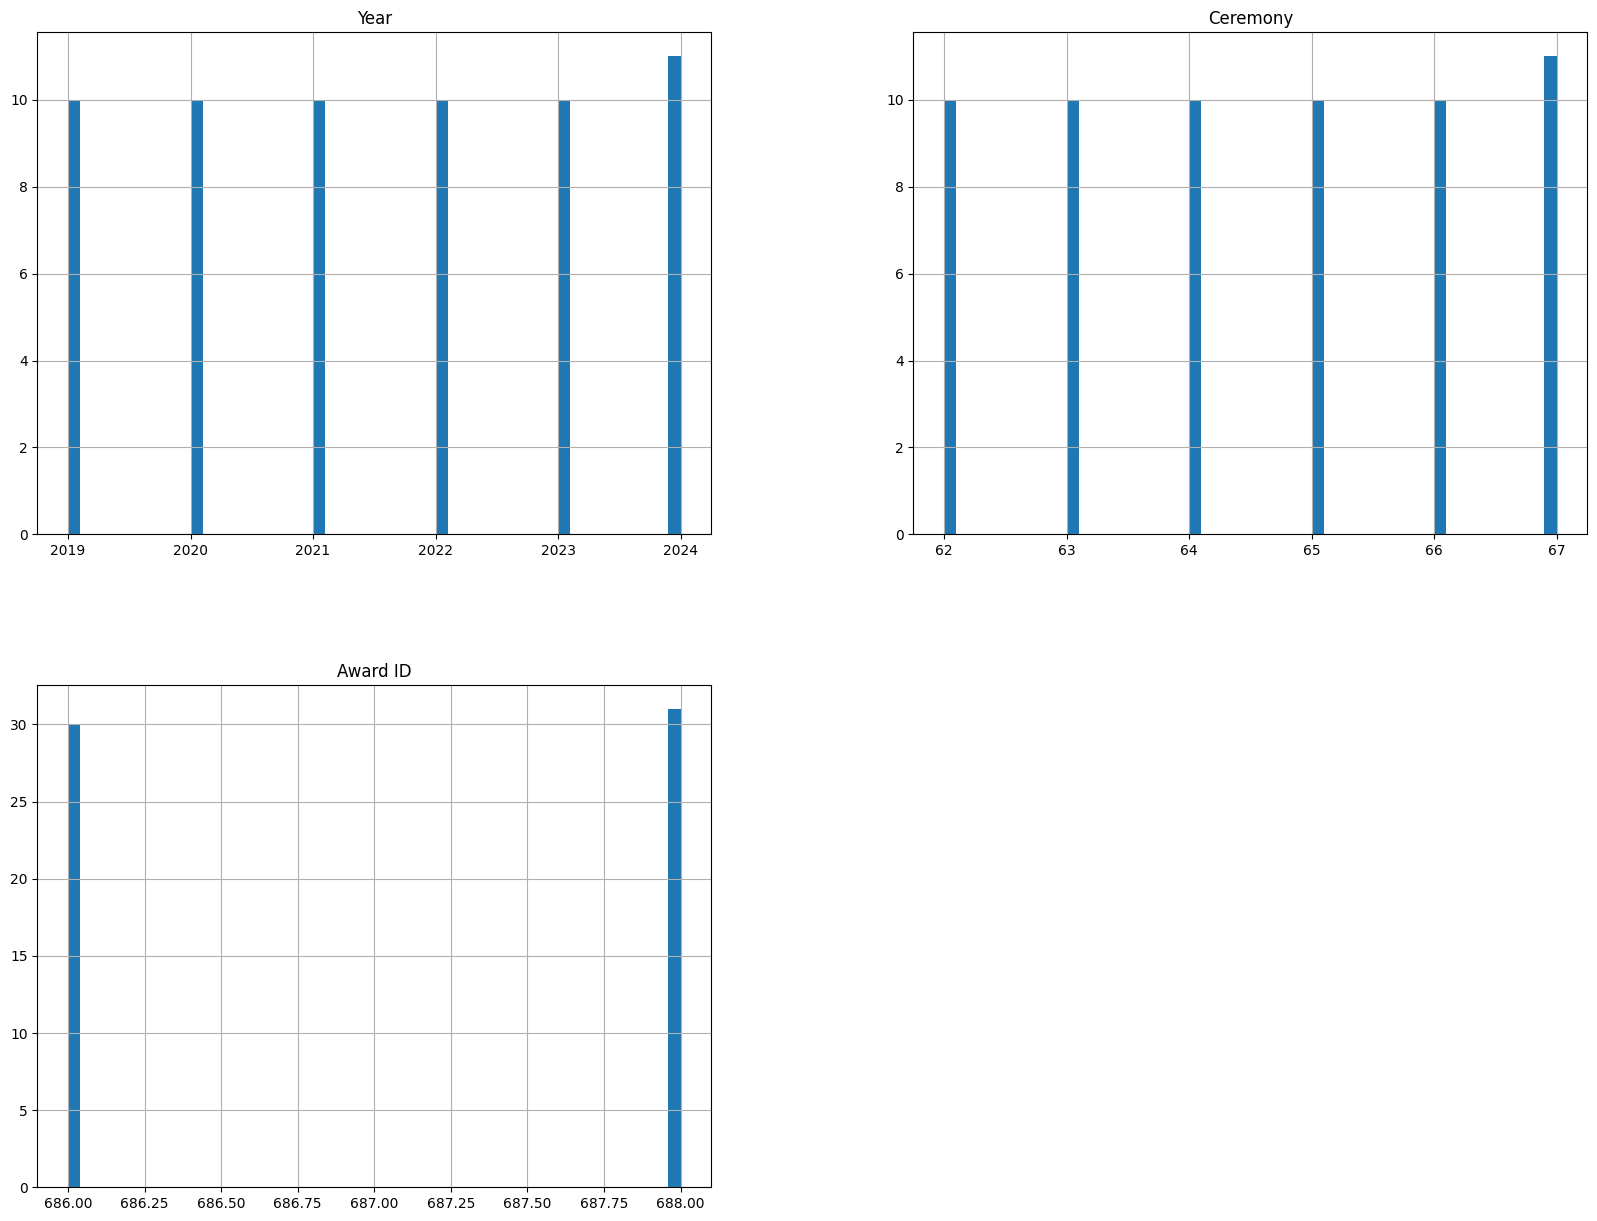

In [29]:
import matplotlib.pylab as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

> ***MISSING VALUE***

In [30]:
df.isnull().sum()

Year          0
Ceremony      0
Award ID      0
Award Type    0
Award Name    0
Work          0
Nominee       0
Winner        0
dtype: int64

<Axes: >

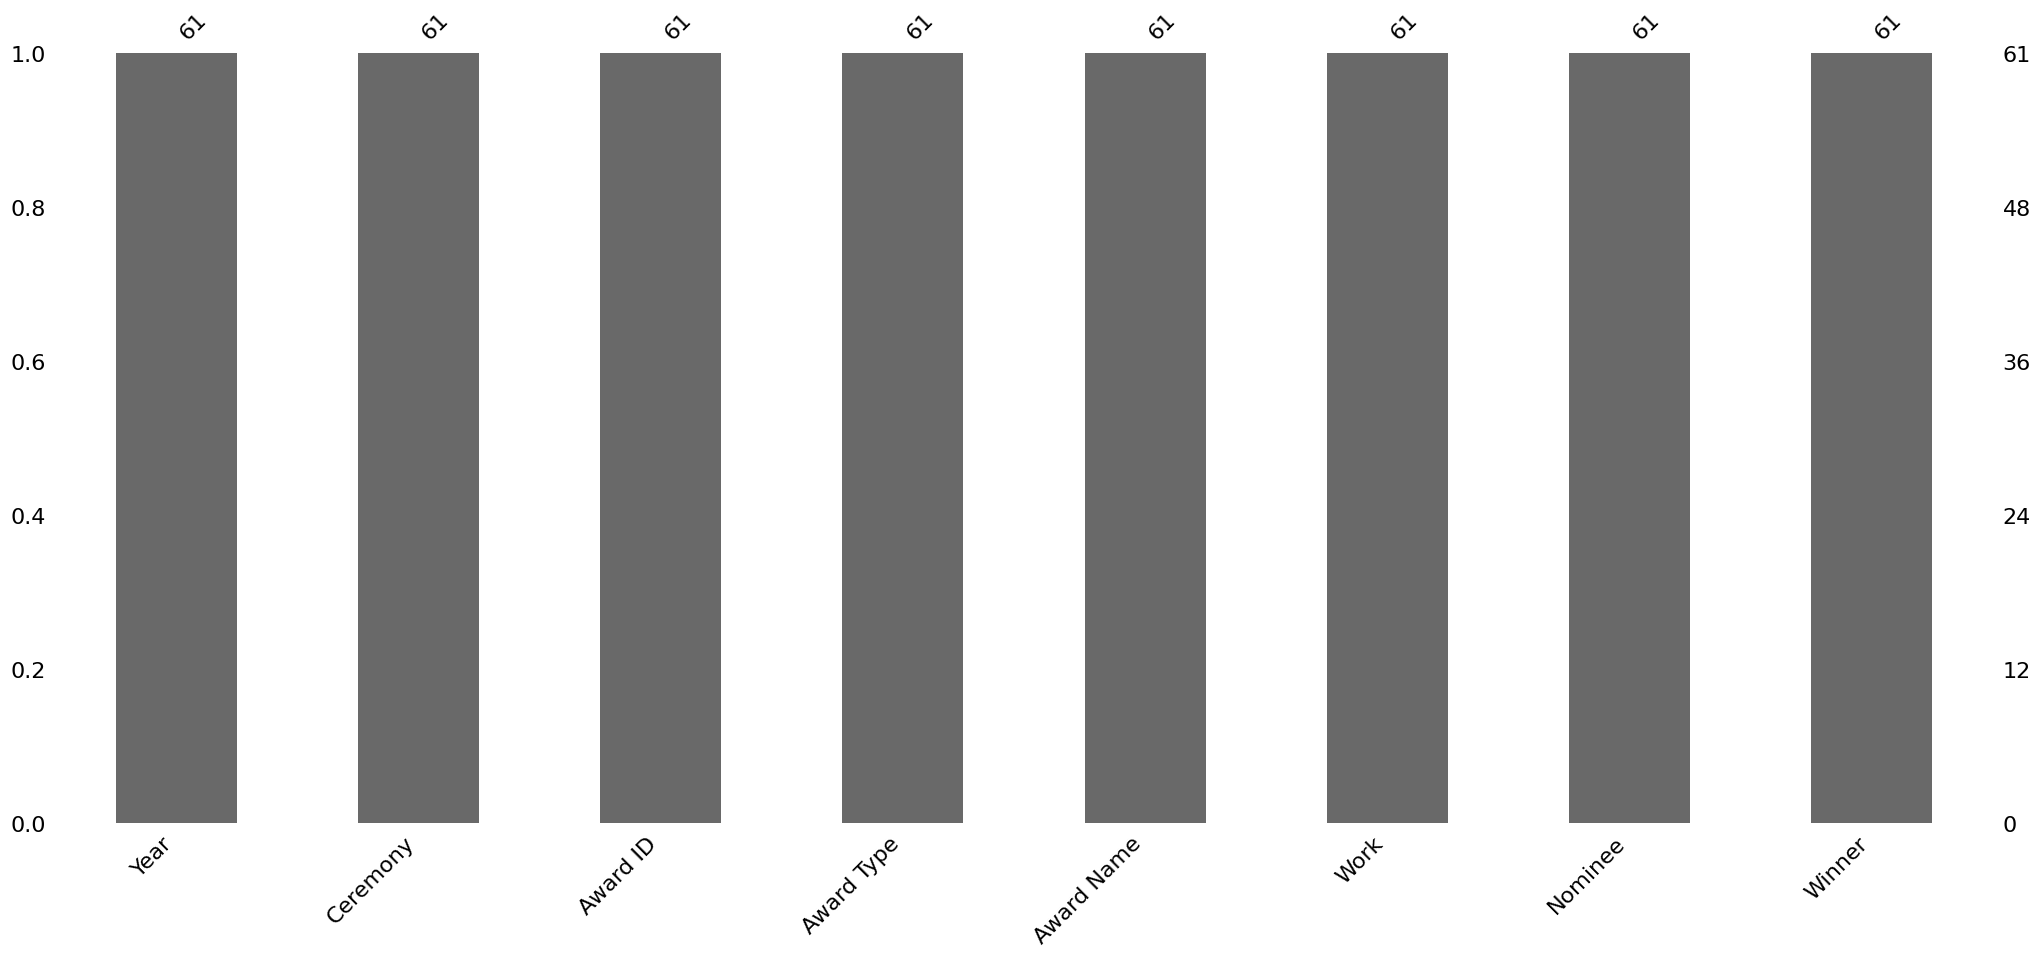

In [31]:
import missingno as msno 
msno.bar(df)

> ***OUTLIER***

In [35]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

outlier_columns = []

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)].shape[0]

    if outlier_count > 0:
        print(f"{column}: {outlier_count} outlier")
        outlier_columns.append(column)

if not outlier_columns:
    print("No outliers found.")

No outliers found.


> ***CATEGORICAL VISUALIZATION***

In [93]:
import seaborn as sns

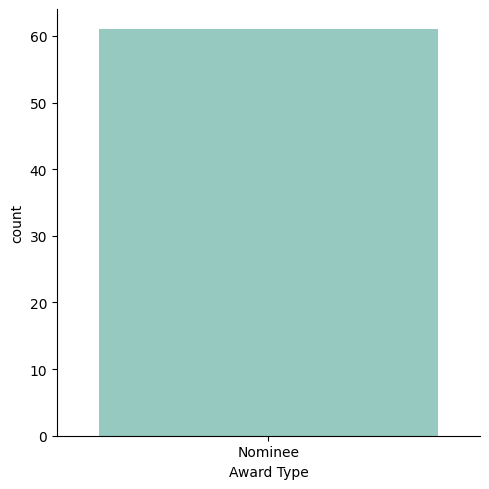

In [38]:
sns.catplot(x="Award Type",kind="count",data=df, palette = "Set3")

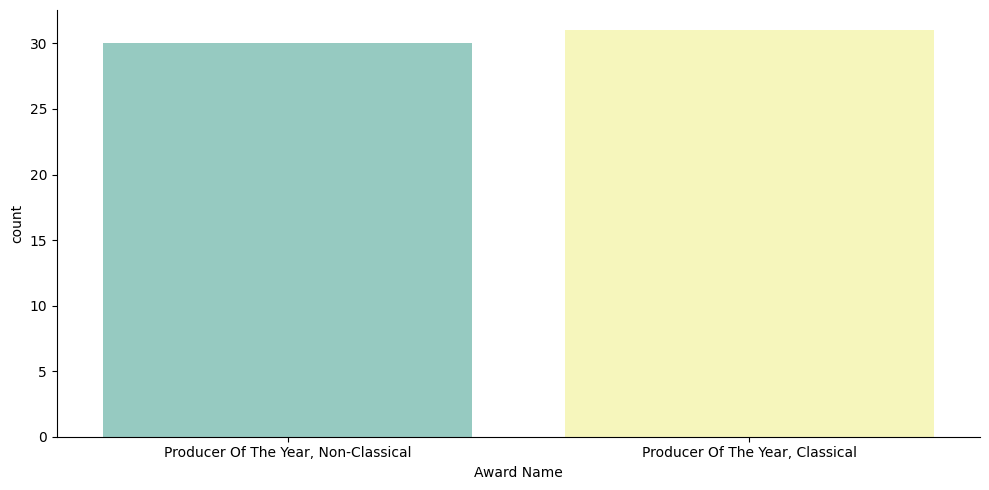

In [40]:
sns.catplot(x="Award Name",kind="count",data=df, palette = "Set3", height=5, aspect=2)

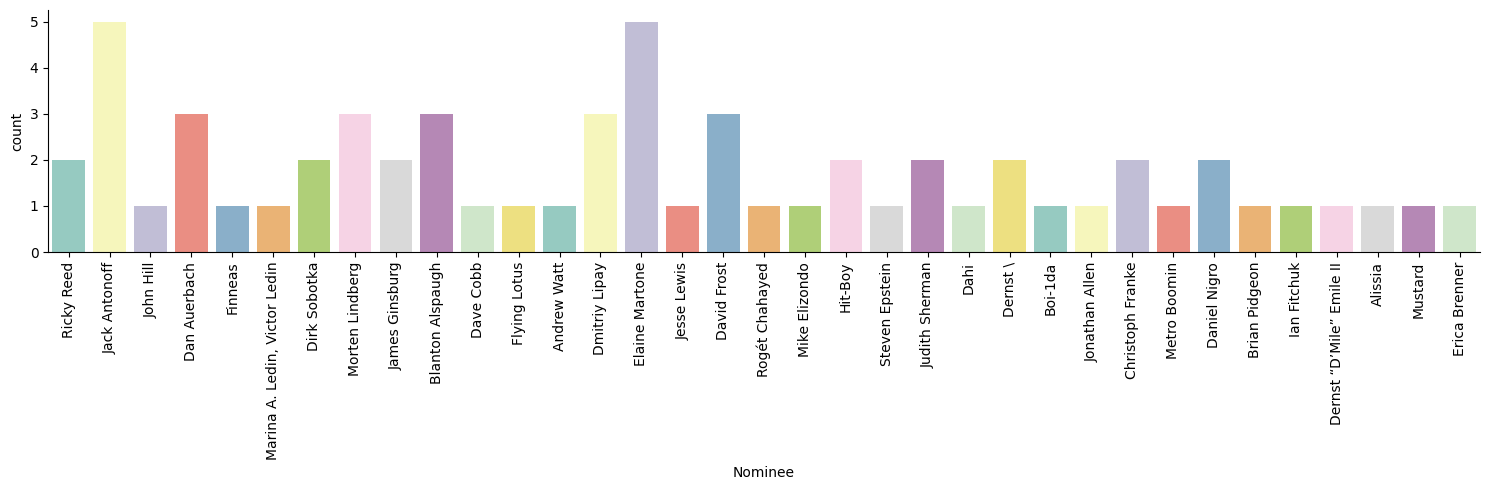

In [48]:
nominee = sns.catplot(x="Nominee", kind="count", data=df, palette="Set3", height=5, aspect=3)
nominee.set_xticklabels(rotation=90)  
plt.tight_layout()  
plt.show()

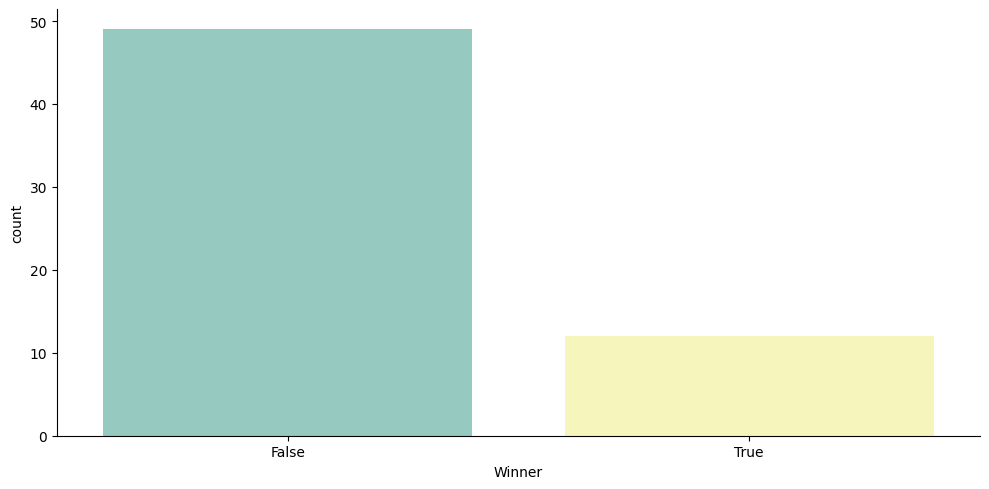

In [51]:
sns.catplot(x="Winner",kind="count",data=df, palette = "Set3", height=5, aspect=2)

> ***NUMERIC VISUALIZATION***

<Axes: xlabel='Ceremony', ylabel='Count'>

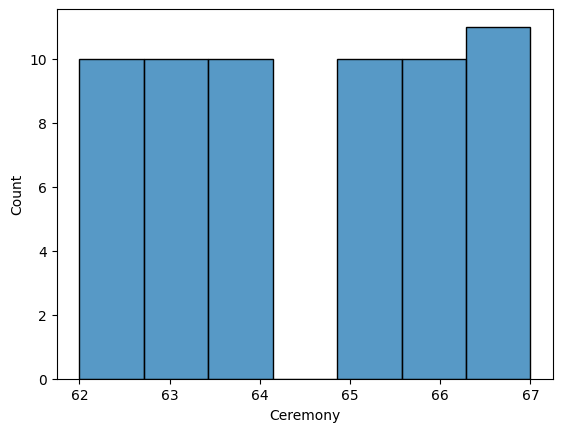

In [52]:
sns.histplot(df['Ceremony'])

<Axes: xlabel='Award ID', ylabel='Count'>

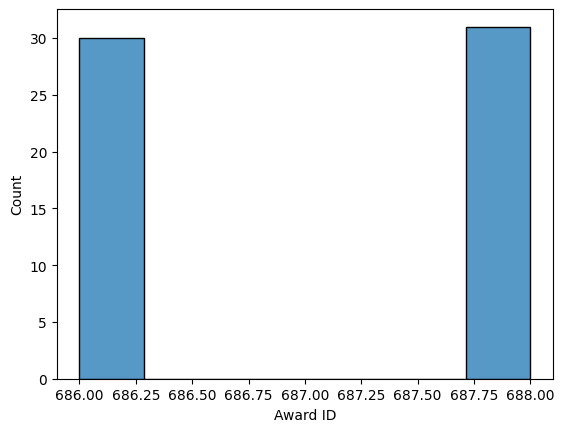

In [53]:
sns.histplot(df['Award ID'])

<Axes: xlabel='Year', ylabel='Count'>

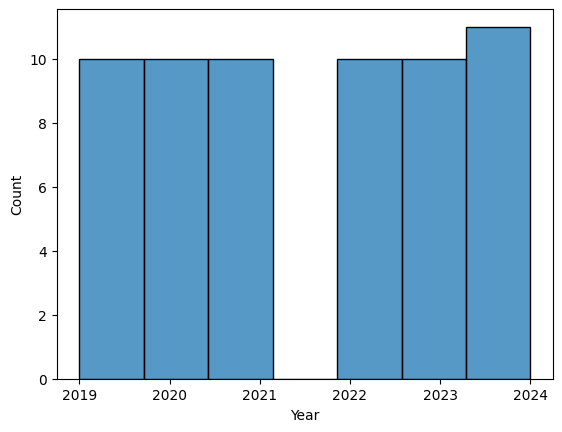

In [54]:
sns.histplot(df['Year'])

> ***VISUALIZATION***

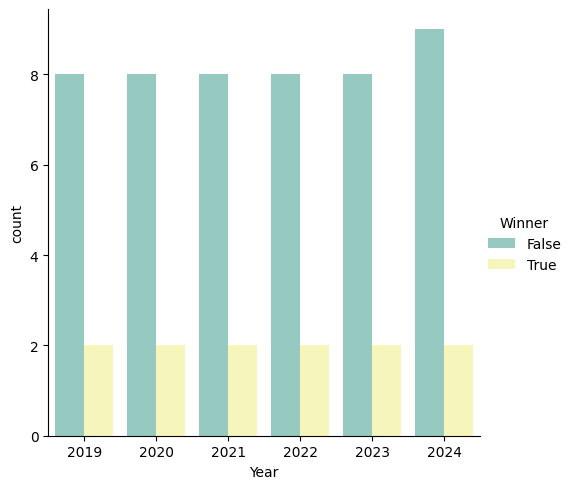

In [61]:
sns.catplot(x="Year",kind= "count", hue="Winner",data=df, palette = "Set3")

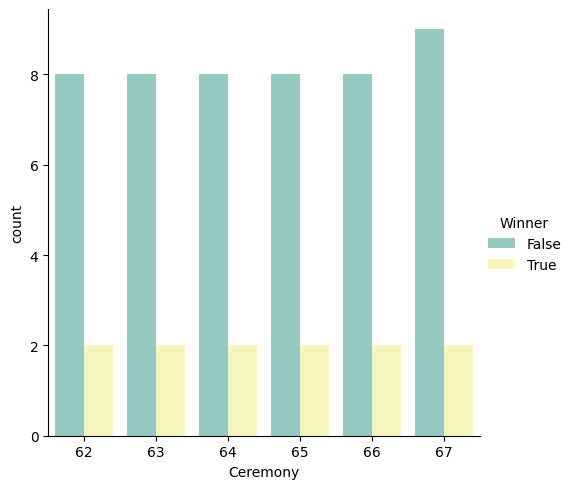

In [62]:
sns.catplot(x="Ceremony",kind= "count", hue="Winner",data=df, palette = "Set3")

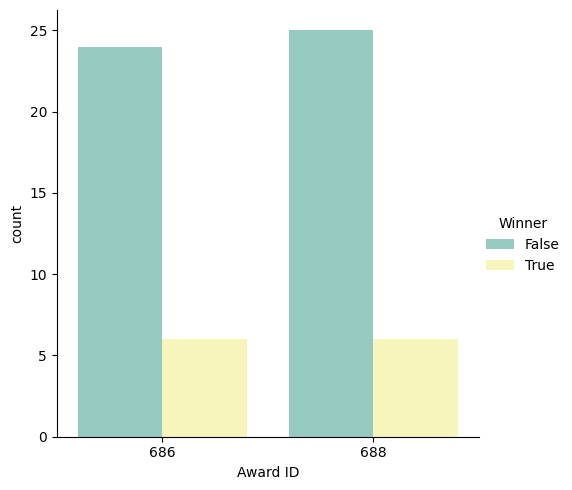

In [63]:
sns.catplot(x="Award ID",kind= "count", hue="Winner",data=df, palette = "Set3")

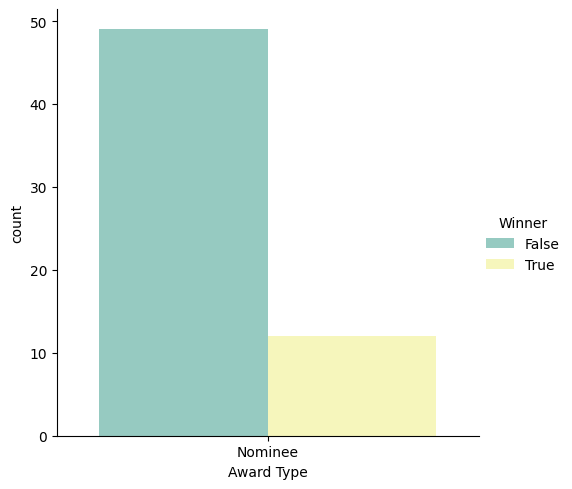

In [64]:
sns.catplot(x="Award Type",kind= "count", hue="Winner",data=df, palette = "Set3")

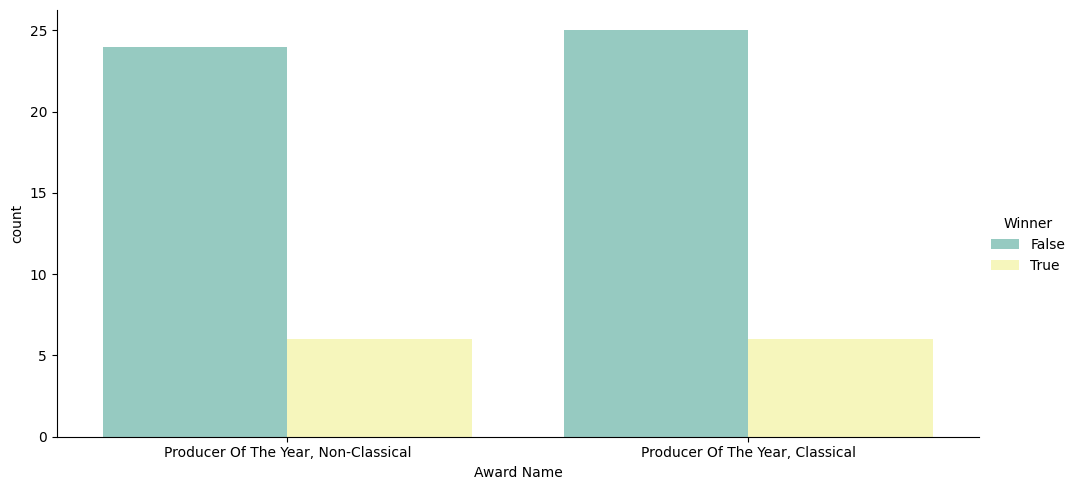

In [66]:
sns.catplot(x="Award Name",kind= "count", hue="Winner",data=df, palette = "Set3", height=5, aspect=2)


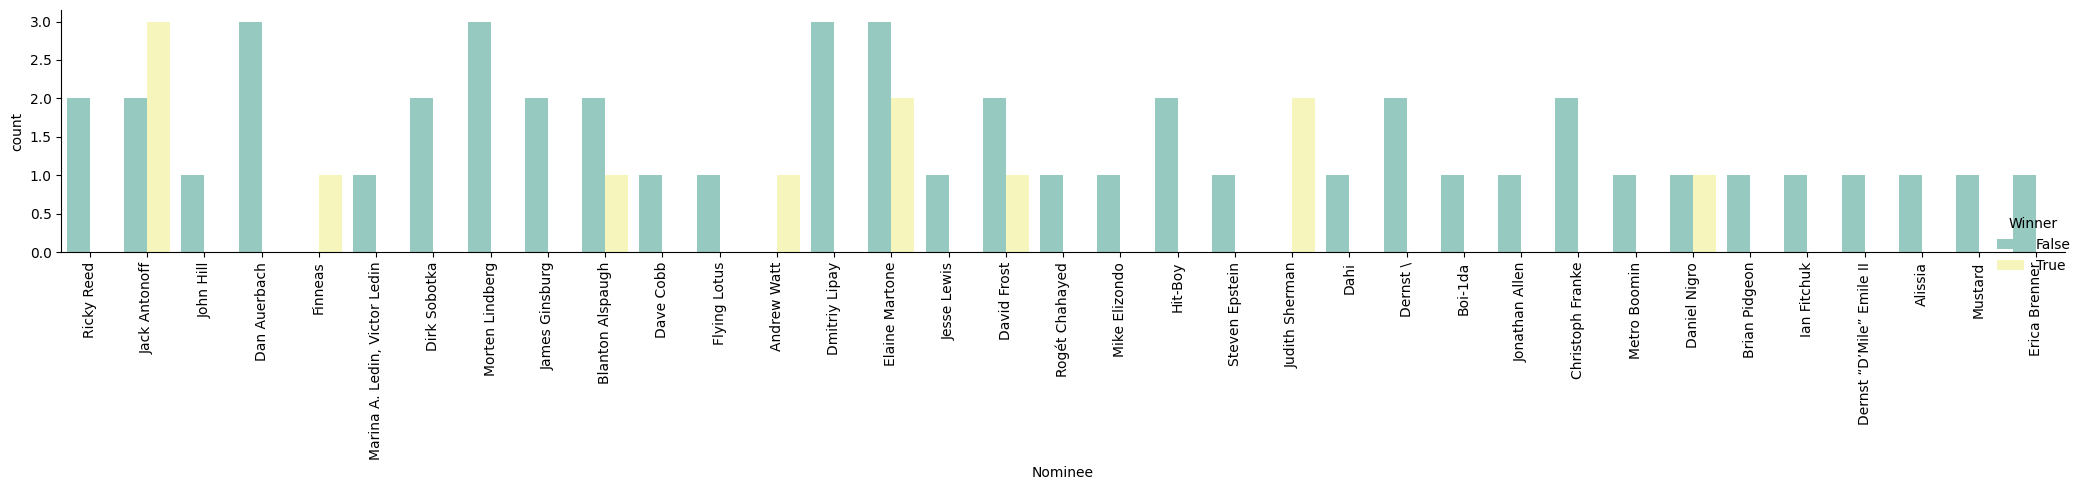

In [77]:
nominee = sns.catplot(x="Nominee",kind= "count", hue="Winner",data=df, palette = "Set3", height=5, aspect=4)
nominee.set_xticklabels(rotation=90) 
plt.tight_layout()  
plt.show()

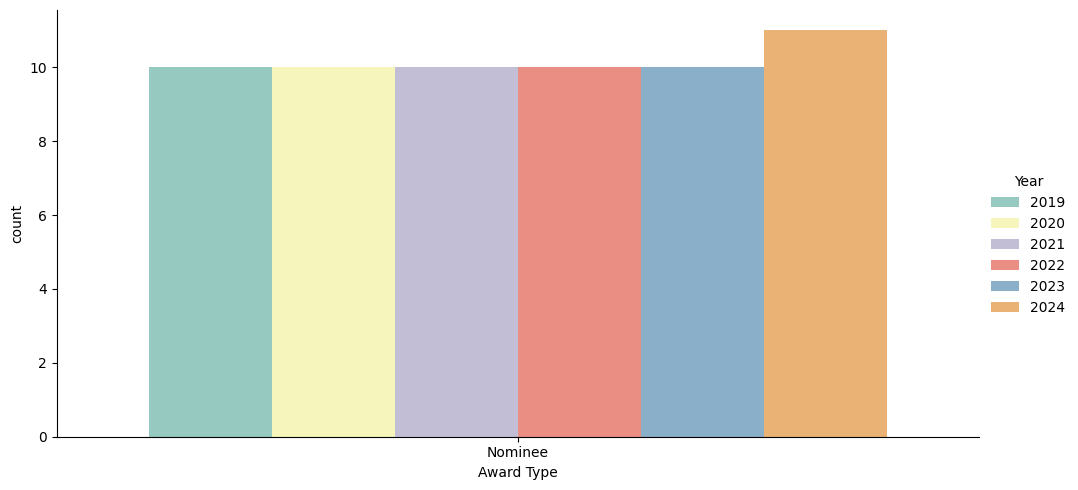

In [79]:
sns.catplot(x="Award Type",kind= "count", hue="Year",data=df, palette = "Set3", height=5, aspect=2)


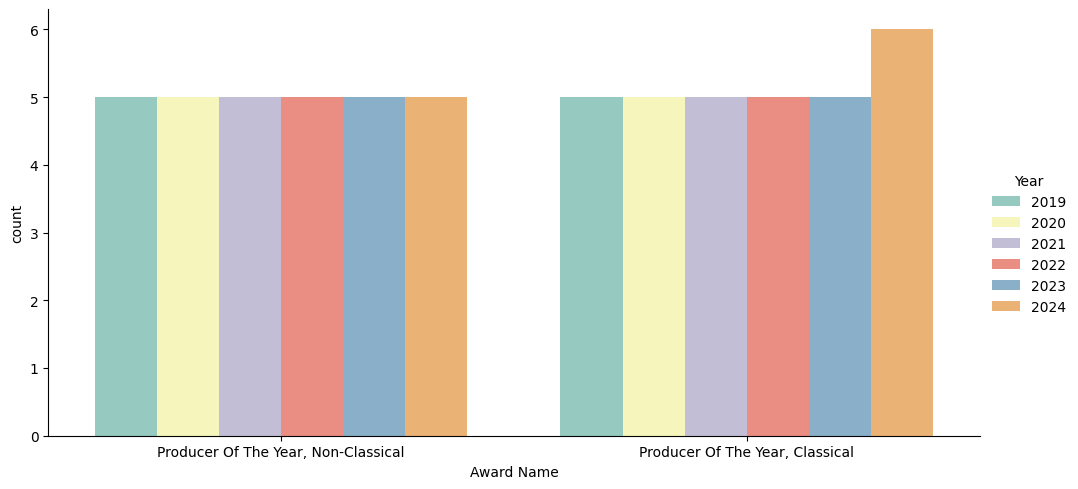

In [80]:
sns.catplot(x="Award Name",kind= "count", hue="Year",data=df, palette = "Set3", height=5, aspect=2)


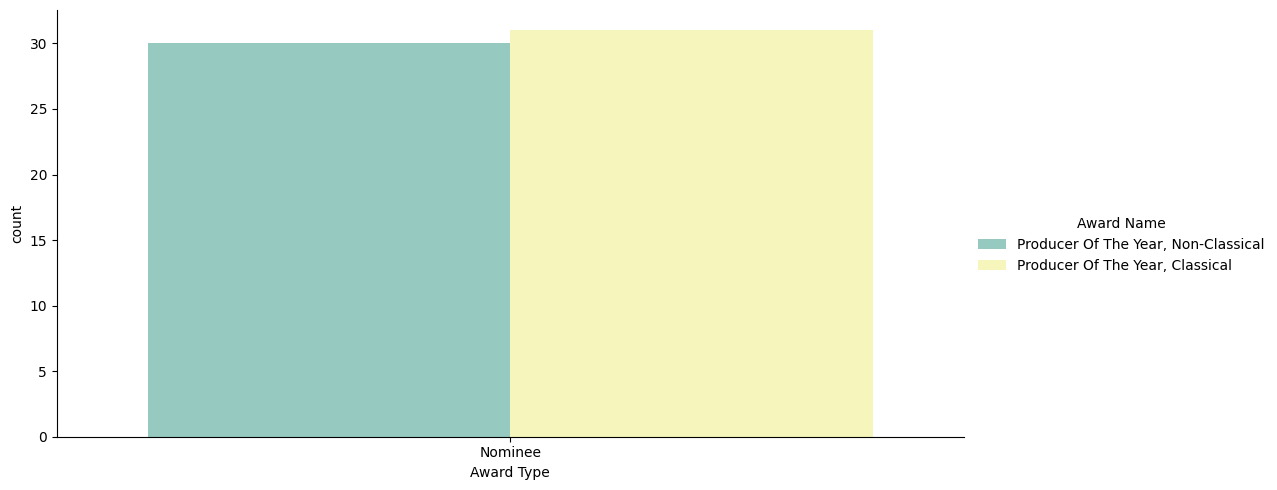

In [82]:
sns.catplot(x="Award Type",kind= "count", hue="Award Name",data=df, palette = "Set3", height=5, aspect=2)

> ***CORRELATION MATRIX***

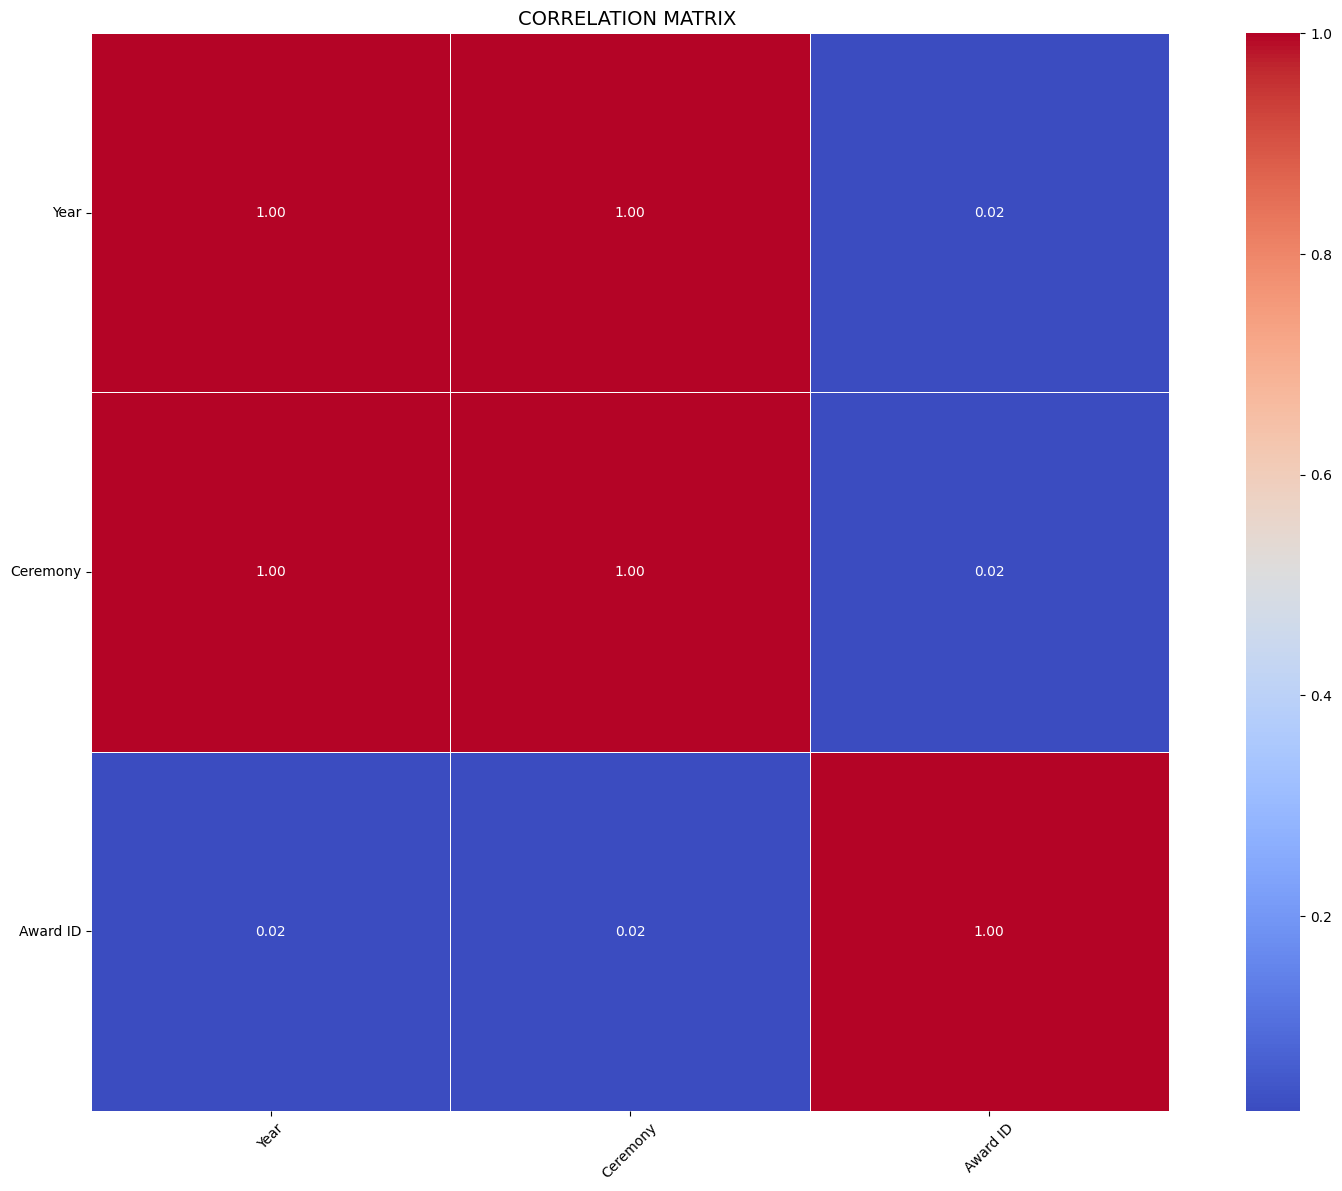

In [89]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5, 
            square=True)
plt.title("CORRELATION MATRIX ", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()